In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
total = pd.read_csv("output.csv")

,player_id,full_name,team,season,week,week_start,conference,pow_conference,games_played_this_week,numMinutes,...,breakout_score,league_pts_mean,league_pts_std,league_ast_mean,league_ast_std,league_pm_mean,league_pm_std,z_s_pts,z_s_ast,z_s_pm
0,305,Robert Parish,Warriors,1979,1,1979-12-31,West,West,3,101.0,...,-0.623703,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,76003,Kareem Abdul-Jabbar,Lakers,1979,1,1979-12-31,West,West,2,82.0,...,-1.218188,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,76005,Tom Abernethy,Warriors,1979,1,1979-12-31,West,West,1,11.0,...,-1.365436,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,76011,Alvan Adams,Suns,1979,1,1979-12-31,West,West,2,64.0,...,-0.576144,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,76085,James Bailey,SuperSonics,1979,1,1979-12-31,West,West,4,41.0,...,0.643651,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [ ]:
total['season']

np.int64(2025)

In [3]:
total.head()

,player_id,full_name,team,season,week,week_start,conference,pow_conference,games_played_this_week,numMinutes,...,breakout_score,league_pts_mean,league_pts_std,league_ast_mean,league_ast_std,league_pm_mean,league_pm_std,z_s_pts,z_s_ast,z_s_pm
0,305,Robert Parish,Warriors,1979,1,1979-12-31,West,West,3,101.0,...,-0.623703,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,76003,Kareem Abdul-Jabbar,Lakers,1979,1,1979-12-31,West,West,2,82.0,...,-1.218188,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,76005,Tom Abernethy,Warriors,1979,1,1979-12-31,West,West,1,11.0,...,-1.365436,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,76011,Alvan Adams,Suns,1979,1,1979-12-31,West,West,2,64.0,...,-0.576144,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,76085,James Bailey,SuperSonics,1979,1,1979-12-31,West,West,4,41.0,...,0.643651,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [23]:
# player win share (using won_player_of_the_week and wins_this_week)

print("Player of the Week Statistics:")
pow_winners = total[total['won_player_of_the_week'] == 1]
non_winners = total[total['won_player_of_the_week'] == 0]
print(f"Total PoW awards: {len(pow_winners)}")
print(f"PoW win rate: {(len(pow_winners) / len(total) * 100):.2f}%")

print("\nMost PoW Awards (Top 10):")
top_pow = pow_winners['full_name'].value_counts().head(10)
print(top_pow)

#print("\nWins This Week - PoW vs Non-PoW:")
#print(f"PoW Winners avg wins: {pow_winners['wins_this_week'].mean():.2f}")
#print(f"Non-PoW avg wins: {non_winners['wins_this_week'].mean():.2f}")

Player of the Week Statistics:
Total PoW awards: 1394
PoW win rate: 0.59%

Most PoW Awards (Top 10):
full_name
LeBron James             64
Kevin Durant             33
Kobe Bryant              29
James Harden             25
Giannis Antetokounmpo    23
Allen Iverson            20
Michael Jordan           20
Karl Malone              20
Tim Duncan               20
Russell Westbrook        19
Name: count, dtype: int64


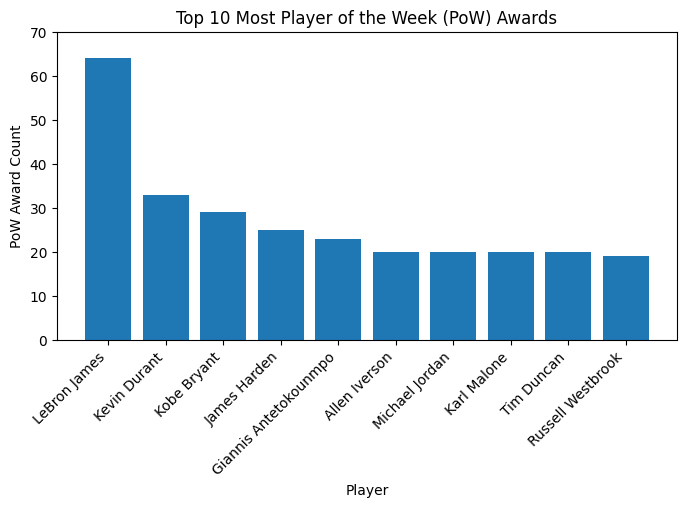

In [29]:
# Most PoW Awards Visual
plt.figure(figsize=(8,4))
plt.bar(top_pow.index, top_pow.values)
plt.xlabel("Player")
plt.ylim(0, 70)
plt.xticks(rotation=45, ha='right')
plt.ylabel("PoW Award Count")
plt.title("Top 10 Most Player of the Week (PoW) Awards")
plt.show()

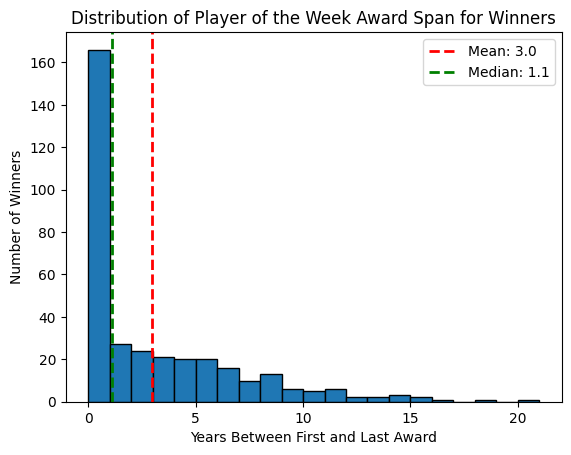

Distribution Metrics:
Mean: 2.97
Median: 1.12
Max: 20.19
Min: 0.00


In [62]:
# Distribution of time span of first to last player of the week award for winners
pow_winners['award_week'] = pd.to_datetime(pow_winners['week_start'])
award_span = pow_winners.groupby('full_name')['award_week'].agg(lambda x: (x.max() - x.min()).days / 365) # Calculates year(s)

mean_span = award_span.mean()
median_span = award_span.median()
max_span = award_span.max()
min_span = award_span.min()

plt.hist(award_span, bins=range(0, int(award_span.max()) + 2), edgecolor='black')

# Add vertical lines for statistics
plt.axvline(mean_span, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_span:.1f}')
plt.axvline(median_span, color='green', linestyle='--', linewidth=2, label=f'Median: {median_span:.1f}')


plt.xlabel('Years Between First and Last Award')
plt.ylabel('Number of Winners')
plt.title('Distribution of Player of the Week Award Span for Winners')
plt.legend()
plt.show()

print('Distribution Metrics:')
print(f"Mean: {mean_span:.2f}")
print(f"Median: {median_span:.2f}")
print(f"Max: {max_span:.2f}")
print(f"Min: {min_span:.2f}")

We can see that the average wins per week is double for players that won player of the week vs. players that did not win: 3.61 vs. 1.82. This shows that our feature 'wins_this_week' can be a potentially good feature for estimating if a player is a winner.

In [49]:
# Wins over the week (wins_this_week)

# Collect all comparison results for visualization
metrics = []
pow_res = []
npow_res = []

"""
print("Games Played This Week:")
print(f"Count: {total['games_played_this_week'].count()}")
print(f"Average: {total['games_played_this_week'].mean():.2f}")
print(f"Standard Deviation: {total['games_played_this_week'].std():.2f}")

p = pow_winners['games_played_this_week'].mean()
n = non_winners['games_played_this_week'].mean()
print(f"PoW Winners Avg: {p:.2f}")
print(f"Non-Winners Avg: {n:.2f}")

metrics.append("Games Played")
pow_res.append(p)
npow_res.append(n)
"""
print("\nWins This Week:")
print(f"Average: {total['wins_this_week'].mean():.2f}")
print(f"Standard Deviation: {total['wins_this_week'].std():.2f}")

p = pow_winners['wins_this_week'].mean()
n = non_winners['wins_this_week'].mean()
print(f"PoW Winners Avg: {p:.2f}")
print(f"Non-Winners Avg: {n:.2f}")

metrics.append("Wins")
pow_res.append(p)
npow_res.append(n)
"""
print("\nWeekly Win Rate:")
weekly_data = total[total['games_played_this_week'] > 0].copy()
weekly_data['week_win_rate'] = weekly_data['wins_this_week'] / weekly_data['games_played_this_week']
print(f"Count: {weekly_data['week_win_rate'].count()}")
print(f"Average: {weekly_data['week_win_rate'].mean():.2f}")
print(f"Standard Deviation: {weekly_data['week_win_rate'].std():.2f}")
pow_weekly = pow_winners[pow_winners['games_played_this_week'] > 0].copy()
pow_weekly['week_win_rate'] = pow_weekly['wins_this_week'] / pow_weekly['games_played_this_week']

non_weekly = non_winners[non_winners['games_played_this_week'] > 0].copy()
non_weekly['week_win_rate'] = non_weekly['wins_this_week'] / non_weekly['games_played_this_week']

print(f"PoW Winners Avg: {pow_weekly['week_win_rate'].mean():.2f}")
print(f"Non-Winners Avg: {non_weekly['week_win_rate'].mean():.2f}")
"""


Wins This Week:
Average: 1.83
Standard Deviation: 1.58
PoW Winners Avg: 3.61
Non-Winners Avg: 1.82


'\nprint("\nWeekly Win Rate:")\nweekly_data = total[total[\'games_played_this_week\'] > 0].copy()\nweekly_data[\'week_win_rate\'] = weekly_data[\'wins_this_week\'] / weekly_data[\'games_played_this_week\']\nprint(f"Count: {weekly_data[\'week_win_rate\'].count()}")\nprint(f"Average: {weekly_data[\'week_win_rate\'].mean():.2f}")\nprint(f"Standard Deviation: {weekly_data[\'week_win_rate\'].std():.2f}")\npow_weekly = pow_winners[pow_winners[\'games_played_this_week\'] > 0].copy()\npow_weekly[\'week_win_rate\'] = pow_weekly[\'wins_this_week\'] / pow_weekly[\'games_played_this_week\']\n\nnon_weekly = non_winners[non_winners[\'games_played_this_week\'] > 0].copy()\nnon_weekly[\'week_win_rate\'] = non_weekly[\'wins_this_week\'] / non_weekly[\'games_played_this_week\']\n\nprint(f"PoW Winners Avg: {pow_weekly[\'week_win_rate\'].mean():.2f}")\nprint(f"Non-Winners Avg: {non_weekly[\'week_win_rate\'].mean():.2f}")\n'

FIX: The average number of games played per week is ~3 and the average number of wins per week is ~1.8. By comparing the two metrics, we can see that on average players win a little more than half of their games per week. This is evident in our weekly win rate ~62%. we how the average for winners is greater than non-winners. Again, this indicates how our features can be good predictors for winners. 

In [50]:
# Win Streak (home_win_streak_prior, away_win_streak_prior)
print("Home Win Streak:")
print(f"Average: {total['home_win_streak_prior'].mean():.2f}")
print(f"Standard Deviation: {total['home_win_streak_prior'].std():.2f}")

p = pow_winners['home_win_streak_prior'].mean()
n = non_winners['home_win_streak_prior'].mean()
print(f"PoW Winners Avg: {p:.2f}")
print(f"Non-Winners Avg: {n:.2f}")

metrics.append("Home Win Streak")
pow_res.append(p)
npow_res.append(n)

print("\nAway Win Streak:")
print(f"Average: {total['away_win_streak_prior'].mean():.2f}")
print(f"Standard Deviation: {total['away_win_streak_prior'].std():.2f}")

p = pow_winners['away_win_streak_prior'].mean()
n = non_winners['away_win_streak_prior'].mean()
print(f"PoW Winners Avg: {p:.2f}")
print(f"Non-Winners Avg: {n:.2f}")

metrics.append("Away Win Streak")
pow_res.append(p)
npow_res.append(n)

Home Win Streak:
Average: 0.97
Standard Deviation: 1.03
PoW Winners Avg: 1.59
Non-Winners Avg: 0.97

Away Win Streak:
Average: 0.63
Standard Deviation: 0.83
PoW Winners Avg: 1.16
Non-Winners Avg: 0.63


FIX: We see here how for home games, despite the belief of "home-team advantage", the average win streak is ~1. This means that teams on average do not go on a win streak > 2 for home games. In the same notion, we see that the average win streak for away games is lower: 0.63. However, we see for both metrics, winners on average have a higher win streak for both home and away games compared to non-winners.

In [52]:
# Wins vs Strong Teams ('is_win_vs_over_500')
print("Win vs. Over .500 Team:")
print(f"Average: {total['is_win_vs_over_500'].mean():.2f}")
print(f"Standard Deviation: {total['is_win_vs_over_500'].std():.2f}")

p = pow_winners['is_win_vs_over_500'].mean()
n = non_winners['is_win_vs_over_500'].mean()
print(f"PoW Winners Avg: {p:.2f}")
print(f"Non-Winners Avg: {n:.2f}")

metrics.append("Win vs. >.500 Team")
pow_res.append(p)
npow_res.append(n)

Win vs. Over .500 Team:
Average: 0.71
Standard Deviation: 1.01
PoW Winners Avg: 1.62
Non-Winners Avg: 0.70


In [53]:
# Wins vs Strong Opponents ('wins_vs_team_with_all_nba_player')
print("Win vs. All-NBA Opponent:")
print(f"Average: {total['wins_vs_team_with_all_nba_player'].mean():.2f}")
print(f"Standard Deviation: {total['wins_vs_team_with_all_nba_player'].std():.2f}")

p = pow_winners['wins_vs_team_with_all_nba_player'].mean()
n = non_winners['wins_vs_team_with_all_nba_player'].mean()
print(f"PoW Winners Avg: {p:.2f}")
print(f"Non-Winners Avg: {n:.2f}")

metrics.append("Win vs. All-NBA Opponent")
pow_res.append(p)
npow_res.append(n)

Win vs. All-NBA Opponent:
Average: 1.42
Standard Deviation: 1.43
PoW Winners Avg: 2.89
Non-Winners Avg: 1.42


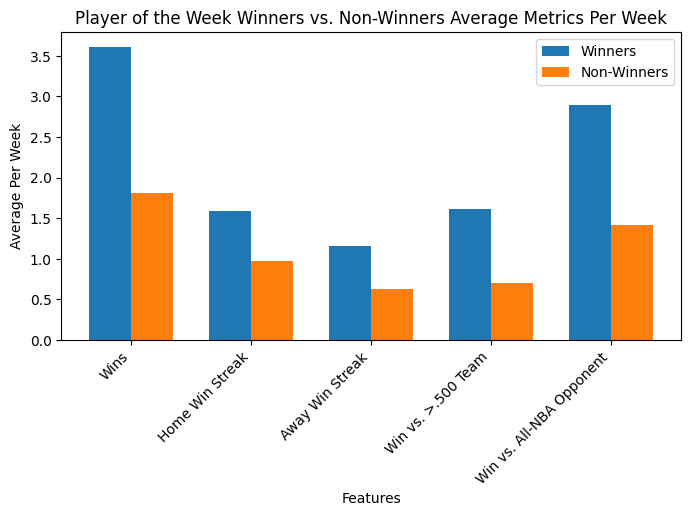

In [55]:
# Visualize Comparisons
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8,4))

pow_bar = ax.bar(x - width/2, pow_res, width, label='Winners')
npow_bar = ax.bar(x + width/2, npow_res, width, label="Non-Winners")

ax.set_xlabel('Features')
ax.set_ylabel('Average Per Week')
ax.set_title("Player of the Week Winners vs. Non-Winners Average Metrics Per Week")
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()

plt.show()

In [57]:
pow_winners['week_start']

102       1979-12-31
117       1980-01-07
281       1980-01-14
384       1980-01-21
580       1980-02-04
             ...    
233548    2025-11-10
233811    2025-11-17
233837    2025-11-17
234215    2025-11-24
234234    2025-11-24
Name: week_start, Length: 1394, dtype: object